# Animals dataset on the Shallownet architecture

In this example, we deploy a shallow net architecture for the Animals dataset. The shallow net is composed by one convolution layer. The purpose of this notebook, is to compare the results obtained from the simple image classifiers (classification model and simple artificial neural network) with the results from the shallow net. Beyond the results, here we deploy the class image_to_array from the compvis module. 

## Importing libraries

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
#compvis modeule
from compvis.preprocessing import ImageToArrayPreprocessor
from compvis.preprocessing import SimplePreprocessor
from compvis.datasets import SimpleDatasetLoader
from compvis.ann.cnns import ShallowNet
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

## Loading and preprocessing the dataset

In [2]:
dataset = "/home/igor/Documents/Artificial_Inteligence/Datasets/Animals" #path
imagePaths = list(paths.list_images(dataset)) # list of all images

In [3]:
sp = SimplePreprocessor(32, 32) # simple image preprocessor
iap = ImageToArrayPreprocessor() # to convert image into arraey
sdl = SimpleDatasetLoader(preprocessors=[sp, iap]) # to load images and process them
(data, labels) = sdl.load(imagePaths, verbose = 500) # return images and labels
data = data.astype("float") / 255. # Normalize into 0 and 1

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


### Splitting the dataset into train and test set

In [4]:
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size = 0.25,
                                                      random_state = 42)

### Transforming the labels

In [5]:
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

## Model

In [6]:
opt = SGD(lr = 0.005)
model = ShallowNet.build(32, 32, 3, 3)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

### Training the model

We choose the batch size of $32$ and $100$ epochs.

In [7]:
H = model.fit(X_train, y_train, validation_data = (X_test, y_test),
              batch_size = 32, epochs = 100, verbose = 1)

Train on 2250 samples, validate on 750 samples
Epoch 1/100
2250/2250 [==============================] - 1s 535us/sample - loss: 1.0089 - accuracy: 0.4676 - val_loss: 0.9548 - val_accuracy: 0.5080
Epoch 2/100
2250/2250 [==============================] - 0s 109us/sample - loss: 0.9298 - accuracy: 0.5178 - val_loss: 0.9088 - val_accuracy: 0.5333
Epoch 3/100
2250/2250 [==============================] - 0s 105us/sample - loss: 0.9001 - accuracy: 0.5431 - val_loss: 0.8731 - val_accuracy: 0.5973
Epoch 4/100
2250/2250 [==============================] - 0s 105us/sample - loss: 0.8758 - accuracy: 0.5538 - val_loss: 0.9958 - val_accuracy: 0.5173
Epoch 5/100
2250/2250 [==============================] - 0s 107us/sample - loss: 0.8648 - accuracy: 0.5596 - val_loss: 0.8456 - val_accuracy: 0.5987
Epoch 6/100
2250/2250 [==============================] - 0s 113us/sample - loss: 0.8389 - accuracy: 0.5880 - val_loss: 0.8453 - val_accuracy: 0.5960
Epoch 7/100
2250/2250 [==============================] - 0s

### Predicting with the trained model

In [8]:
predictions = model.predict(X_test, batch_size = 32)

### Evaluating the model

In [9]:
cr = classification_report(y_test.argmax(axis = 1),
                           predictions.argmax(axis = 1),
                           target_names = ["cat", "dog", "panda"])

In [10]:
print(cr)

              precision    recall  f1-score   support

         cat       0.57      0.85      0.68       249
         dog       0.66      0.40      0.49       239
       panda       0.88      0.78      0.83       262

    accuracy                           0.68       750
   macro avg       0.70      0.68      0.67       750
weighted avg       0.70      0.68      0.67       750



## Visualizing the metrics results

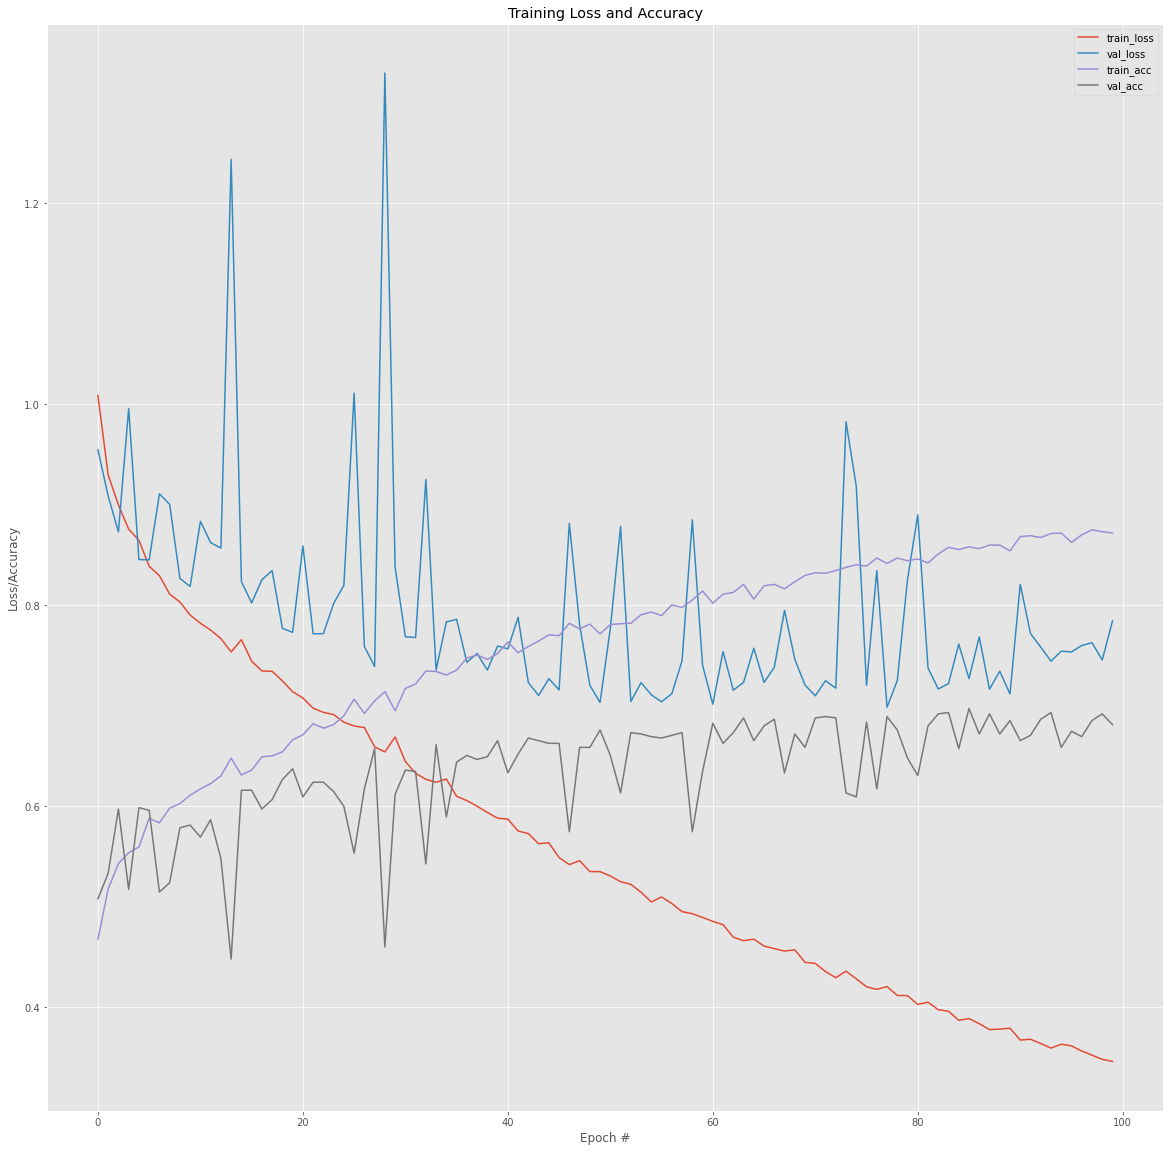

In [11]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20))
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


## Conclusions

As we can see, the simple fact of adding the convolutional layer, allowed us to obtain a significant gain for the accuracy. For example, when we’ve considered the K-Nearest Neighbors classification method and the simple Artificial Neural Network, we obtained $60\%$ of accuracy for the both methods. In this example our result is $70\%$ of accuracy on the test set (the results for the training and validation is better), a gain of $10\%$.  The advantages of considering the Convolutional Neural Network (CNN) is the feature extraction. We are going to see that, how more deep is our CNN, we can improve the results until to reach the state of art. Let's go on ahead in the fabulous Deep Learning world.